import all necessary items

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download(['vader_lexicon'])

[nltk_data] Downloading package vader_lexicon to C:\Users\Tim
[nltk_data]     Kraemer\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Import all dataframes

In [102]:
tweet_data = pd.read_csv('Tweet.csv',  index_col=0)
AAPLE_stock = pd.read_csv('AAPL_Historical_Data.csv')
AMZN_stock = pd.read_csv('AMZN_Historical_Data.csv')
GOOGL_stock = pd.read_csv('GOOGL_Historical_Data.csv')
TSLA_stock = pd.read_csv('TSLA_Historical_Data.csv')
company_tweet_data = pd.read_csv('Company_Tweet.csv')
sentimental_tweets = pd.read_csv('Sentimental_Tweets.csv', index_col=0)

C:\Users\Tim Kraemer\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Specify Company, and Slice All Tweets to only get Tweets about specified company

In [197]:
company = 'AAPL'
tweets_from_company = company_tweet_data[company_tweet_data.ticker_symbol==company].tweet_id
TA = tweet_data.loc[tweets_from_company]

Specify the date, Slice Specified Company Tweet Data to only have tweets in the specified date range

In [244]:
date1 = pd.to_datetime('01/15/2015')
date2 = pd.to_datetime('02/16/2015')

TA1 = TA[pd.to_datetime(TA.post_date*1e9, origin='unix') > date1]
TA2 = TA1[pd.to_datetime(TA1.post_date*1e9, origin='unix') < date2]

Gets the index(Tweet ID) for the specified tweets

In [245]:
tweets_in_window = TA2.index

Get the sentimental data from the sentimental data frame for the specified tweets

In [246]:
S = sentimental_tweets.loc[tweets_in_window]
S

,Date,Positive,Negative,Neutral,Compound
tweet_id,,,,,
555876364029423620,2015-01-15 23:57:07,0.000,0.078,0.922,-0.1531
555875906472779779,2015-01-15 23:55:18,0.000,0.000,1.000,0.0000
555875565178081281,2015-01-15 23:53:57,0.000,0.137,0.863,-0.2263
555875255843954690,2015-01-15 23:52:43,0.168,0.094,0.738,0.2732
555875247702814721,2015-01-15 23:52:41,0.157,0.088,0.755,0.2732
...,...,...,...,...,...
566398946927726592,2015-02-14 00:50:06,0.000,0.000,1.000,0.0000
566398799136821248,2015-02-14 00:49:31,0.000,0.241,0.759,-0.6597
566398691880468481,2015-02-14 00:49:05,0.000,0.000,1.000,0.0000


In [252]:
selected_tweets = S.Compound.sort_values()[:100].index
for s in tweet_data.loc[selected_tweets].body:
    print(s)


WTF?! ALL this volatility for a No Surprise FED action? FREAKING BULLSHIT!! Stewpid Shit!! - $SPY $DIA $QQQ $DAX $NFLX $AAPL $USDJPY $EURUSD
Apple would be stupid to drop Google from Safari. People will be pissed and just switch back.  Stick with the Devil you know $GOOG $AAPL
@andreascseh @MarkYusko @scarletfu you're an idiot Cseh. What the hell is wrong with you? Apple hater. $aapl
$aapl FEAR FEAR FEAR!
$AAPL just filled the gap from Jan 7-8th. I'd give it another shot today but man it looks weak as hell and every bounce is sold hard.
"@GrindTime: $AAPL  ISIS threatens to kill 2 Japanese hostages unless  http://stks.co/h1aFj" WTF does this have to do with stocks
$AAPL's had a legendary run for sure, but the herd's expectations of future business results seem to suffer from severe base rate neglect.
what really pissed me off GOVT going to war again, Im short $AAPL   this will probably get redacted because it not happy
Everyone's saying numbers are insane for $AAPL but where's that mov

Plot the Compound of the Sentiments over time

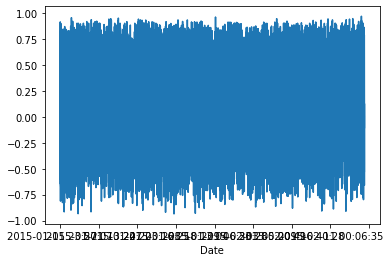

In [253]:
S.set_index('Date').Compound.plot()

Plot the scatter plot for the Compound over time

In [232]:
SD = S.Date
SD
SD.Date.index

AttributeError: 'Series' object has no attribute 'Date'

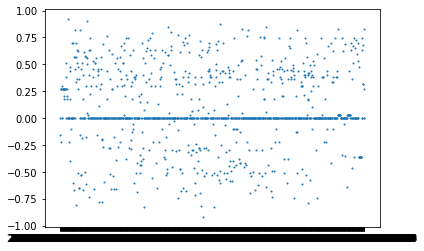

In [229]:

plt.scatter(SD[SD, SC.COmpound, s=1)

In [179]:
Sc = S.Compound

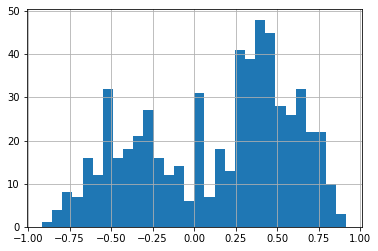

In [227]:
Sc[Sc!=0].hist(bins=30)